In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express
import cv2 as cv
from sklearn import linear_model

plt.style.use("seaborn")

warnings.filterwarnings('ignore')

In [2]:
def plot_image(image, i = 0):
    l = [cv.COLOR_BGR2RGB, cv.COLOR_BGR2GRAY, cv.COLOR_RGB2GRAY,]
    plt.imshow(cv.cvtColor(image, l[i]))
    plt.show(block = True)

In [3]:
def display_image(image):
    cv.imshow('image', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [41]:
def plot_graph(image, i = 0, hue=None):
    plt.figure(figsize = (15, 8))
    sns.scatterplot(np.arange(len(image.sum(i))), MinMaxScalar(image.sum(i)), label = 'a', alpha = 0.6, hue=hue)
    sns.scatterplot(np.arange(len(image.sum(i))), sigmoid(MinMaxScalar(image.sum(i))), label = 'b', alpha = 0.6, hue=hue)

In [19]:
def plot_graph_(image, i = 0):
    df = pd.DataFrame(np.array([np.arange(len(image.sum(0))), MinMaxScalar(image.sum(0)), sigmoid(MinMaxScalar(image.sum(0)))]).T, columns = ['img_x', 'img_y1', 'img_y2'])
    plot = express.scatter(data_frame = df, x = 'img_x', y = ['img_y1', 'img_y2'], opacity = 0.5)
    return plot

In [6]:
def MinMaxScalar(x, a = -1, b = 1):
    N = (x - x.min()) * (b - a)
    D = (x.max() - x.min())
    return (N / D) + a

In [14]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [46]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [48]:
def relu(x):
    return np.maximum(0, x)

In [50]:
def lrelu(x, c = 0.01):
    return np.maximum(c * x, x)

In [7]:
image = cv.imread('2.jpg', 0)
image.shape

(617, 878)

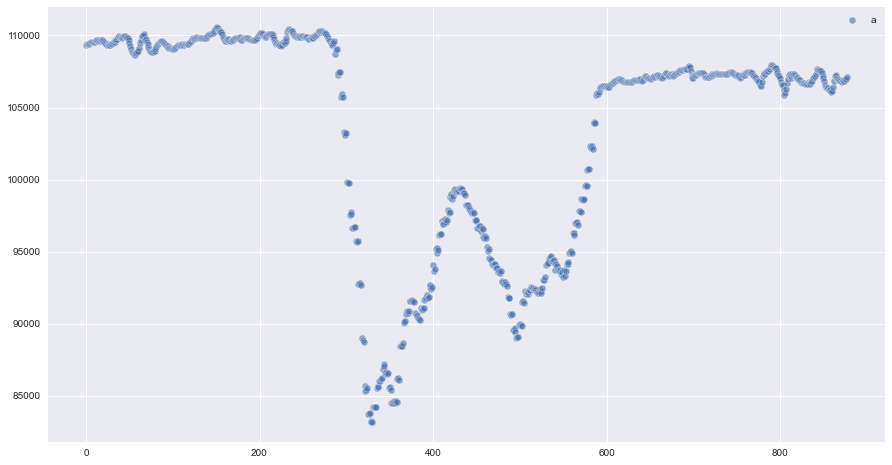

In [8]:
plot_graph(image)

In [20]:
plot_graph_(image)

In [25]:
y1 = image.sum(0)
x1 = np.arange(len(y1))
c1 = y1.copy()
c1[: 270 + 1] = 1
c1[270 + 1: 600 + 1] = 0
c1[600 + 1: ] = 1

In [37]:
x1.shape, c1.shape

((878,), (878,))

<AxesSubplot:>

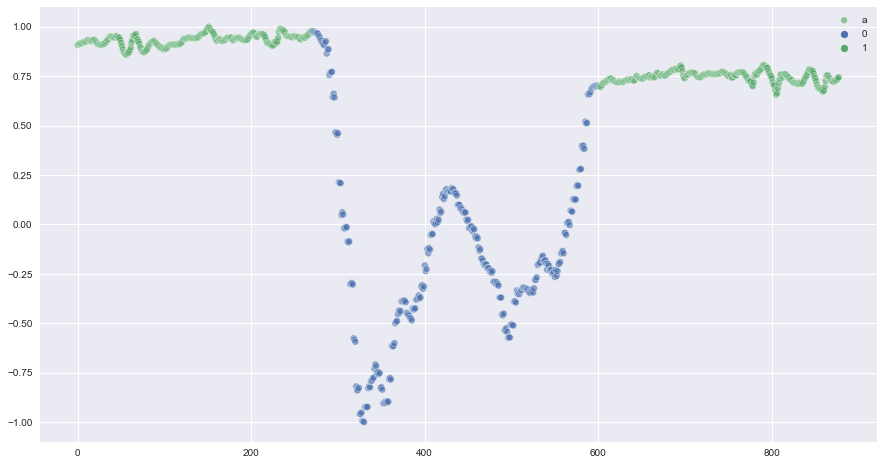

In [53]:
i = 0
plt.figure(figsize = (15, 8))
sns.scatterplot(np.arange(len(image.sum(i))), MinMaxScalar(image.sum(i)), label = 'a', alpha = 0.6, hue=c1)
# sns.scatterplot(np.arange(len(image.sum(i))), sigmoid(MinMaxScalar(image.sum(i))), label = 'b', alpha = 0.6, hue=c1)

<AxesSubplot:>

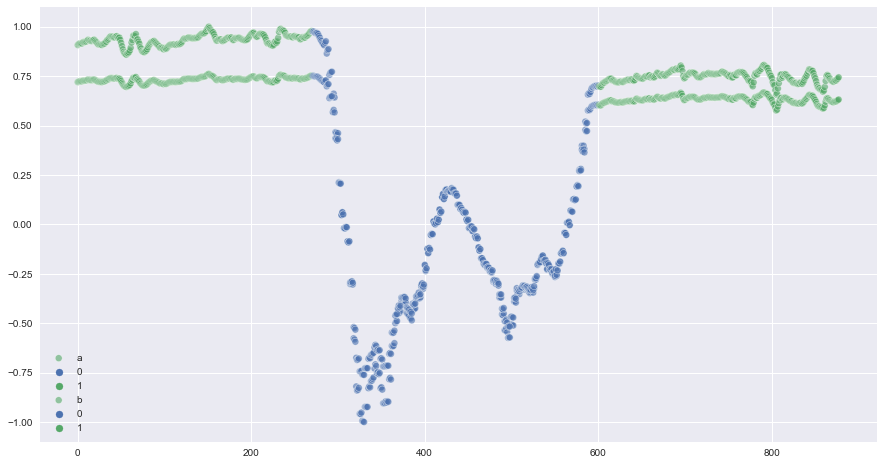

In [47]:
i = 0
plt.figure(figsize = (15, 8))
sns.scatterplot(np.arange(len(image.sum(i))), MinMaxScalar(image.sum(i)), label = 'a', alpha = 0.6, hue=c1)
sns.scatterplot(np.arange(len(image.sum(i))), tanh(MinMaxScalar(image.sum(i))), label = 'b', alpha = 0.6, hue=c1)

<AxesSubplot:>

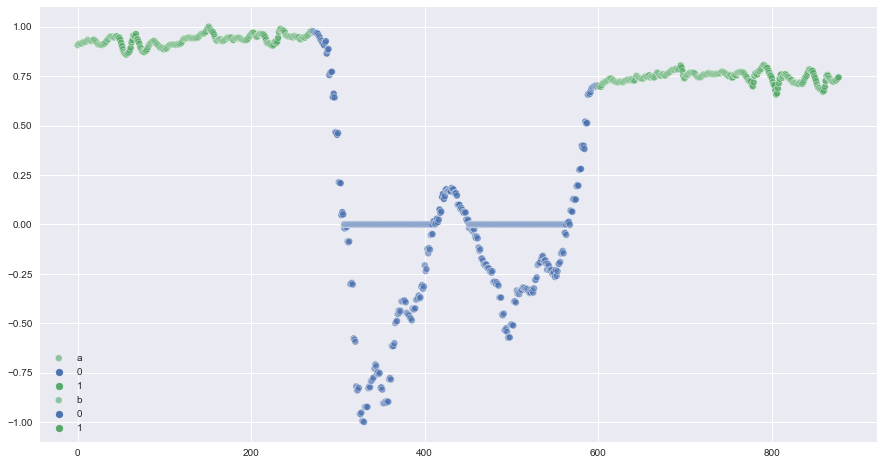

In [49]:
i = 0
plt.figure(figsize = (15, 8))
sns.scatterplot(np.arange(len(image.sum(i))), MinMaxScalar(image.sum(i)), label = 'a', alpha = 0.6, hue=c1)
sns.scatterplot(np.arange(len(image.sum(i))), relu(MinMaxScalar(image.sum(i))), label = 'b', alpha = 0.6, hue=c1)

<AxesSubplot:>

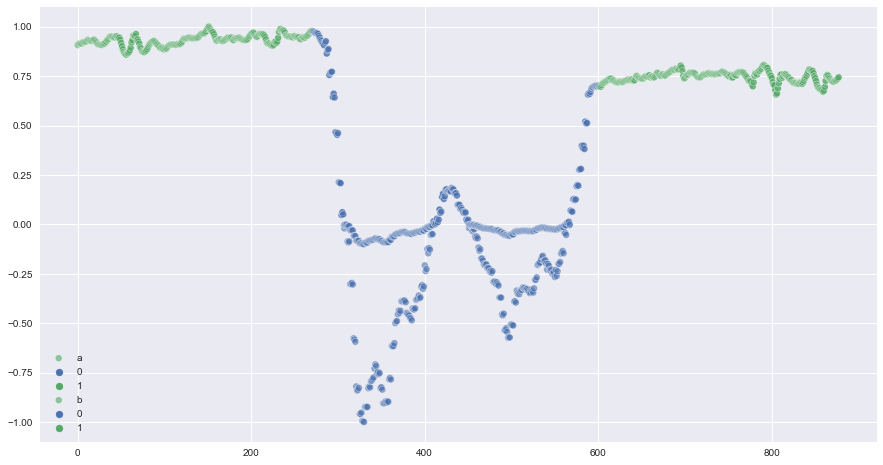

In [52]:
i = 0
plt.figure(figsize = (15, 8))
sns.scatterplot(np.arange(len(image.sum(i))), MinMaxScalar(image.sum(i)), label = 'a', alpha = 0.6, hue=c1)
sns.scatterplot(np.arange(len(image.sum(i))), lrelu(MinMaxScalar(image.sum(i)), 0.1), label = 'b', alpha = 0.6, hue=c1)